<a href="https://colab.research.google.com/github/VivianKuKu/CASA0018_Deep-Learning-for-Sensor-Network_Potholes-Detection/blob/main/Project/CASA0018_Potholes_Detection_Image_Classification_final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Instruction**

The original dataset is located in my personal google drive directory. If you want to execute the model please see the following steps. However, part of images are taken by myself or from the Google Image so the result may different from the records here.



1.   Download Pothole dataset from-
https://www.kaggle.com/chitholian/annotated-potholes-dataset

2.   Download Plain Road dataset from-
https://www.kaggle.com/virenbr11/pothole-and-plain-rode-images

3.   Find 'Data Processing' > 'Setup Environments' - Change the paths to where you save your dataset.


## **Data Processing**


##### Setup Environments

In [ ]:
from google.colab import drive #Connect to my Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os #for creating path names and manipulating directories/files in an operating system
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from PIL import Image 
import PIL 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import datetime #for tensorboard and logging

print(tf.__version__)

2.8.0


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load the TensorBoard notebook extension
%load_ext tensorboard


#####Connect to Data Directory in Google Drive

In [ ]:
path = '/content/drive/My Drive/CASA0018_Deep Learning for Sensor Network' #Directories of Google Drive
os.chdir(path) #Go to path
os.listdir(path) #List out files in the path
print("Files and directories in '", path, "' :", os.listdir(path))





Files and directories in ' /content/drive/My Drive/CASA0018_Deep Learning for Sensor Network ' : ['potholes_v_non-potholes', 'Image', 'model', 'prediction', 'logs', 'model_no_quant.tflite', 'my.tflite', 'data processing_cropped', 'data processing_original', 'my_2.tflite', 'mugsplant.h5', 'my_3.tflite', 'my_4.tflite', 'Log.gsheet', 'potholes.h5']


##### **Check Images**

Plain road images have similar camera angles and contain too much unnecessary information. 

pothole image:  (720, 720, 3)
palin road image:  (2448, 3264, 3)


<Figure size 432x288 with 0 Axes>

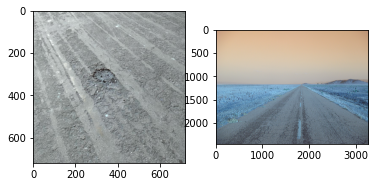

In [ ]:
## CHECKING IMAGES FOR CONFIRMATION ##
os.chdir(path)

import cv2
from google.colab.patches import cv2_imshow # for image display

plt.figure()
f, axarr = plt.subplots(1,2) #subplot(r,c) provide the no. of rows and columns

## Check Pothole Images ##
img_pothole = cv2.imread("./Image/Potholes/img-50.jpg")
print("pothole image: ", img_pothole.shape)
axarr[0].imshow(img_pothole)
# print(img_pothole.dtype)
# plt.imshow(img_pothole)


## Check Plain Road Images ##
img_plain_road = cv2.imread("./data processing_original/2.jpg")
print("palin road image: ", img_plain_road.shape)
axarr[1].imshow(img_plain_road)
# print(img_plain_road.dtype)
# plt.imshow(img_plain_road)

##### **Image Processing**

Using Pillow package to resize and crop the plain road images.

*Ignore the error- some image doesn't fit the cropping size.

In [ ]:
##Ignore the error- some image doesn't fit the cropping size##


from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import save_img

def crop_img (SOURCE, DESTINATION):
    
    for filename in os.listdir(SOURCE):
        img_original = cv2.imread(SOURCE + filename)
        # print(img_original.shape)

        img_resize= tf.image.resize_with_crop_or_pad(img_original, 300, 300)
        # print(img_resize.shape)
        # plt.imshow(img_resize)
        
        img_crop = tf.image.crop_to_bounding_box(img_resize, 150, 100, 150, 150)  #img, offset_height, offset_width, target_height, target_width
        # print(img_crop.shape)
        # plt.imshow(img_crop)
        
        img_array = img_to_array(img_crop)
        # save_img(filename, img_array)
        # keras.utils.save_img(DESTINATION + filename, img_array)
        save_img(DESTINATION + filename, img_array)
      
        this_file = DESTINATION + filename
        copyfile(this_file, './Image/Plain road/'+filename)

        # this_file = SOURCE + filename
        # destination = DESTINATION + filename
        # copyfile(this_file, destination)
        

crop_path = './data processing_original/'
crop_destination_path = './data processing_cropped/'
crop_img(crop_path, crop_destination_path)



##### **Check Processed Images**

<Figure size 432x288 with 0 Axes>

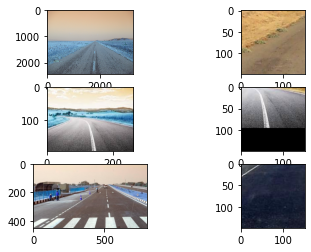

In [ ]:
plt.figure()
f, axarr = plt.subplots(3,2) #subplot(r,c) provide the no. of rows and columns

## Original 1##
orgin_plain_1 = cv2.imread("./data processing_original/2.jpg")
axarr[0][0].imshow(orgin_plain_1)
## Processed 1##
processed_plain_1 = cv2.imread("./Image/Plain road/2.jpg")
axarr[0][1].imshow(processed_plain_1)


## Processed 2##
orgin_plain_2 = cv2.imread("./data processing_original/13.jpg")
axarr[1][0].imshow(orgin_plain_2)
## Processed 2##
processed_plain_2 = cv2.imread("./Image/Plain road/13.jpg")
axarr[1][1].imshow(processed_plain_2)


## Original 3##
orgin_plain_3 = cv2.imread("./data processing_original/248.Roads.jpg")
axarr[2][0].imshow(orgin_plain_3)
## Processed 3##
processed_plain_3 = cv2.imread("./Image/Plain road/248.Roads.jpg")
axarr[2][1].imshow(processed_plain_3)



In [ ]:
print("# of Potholes: ", len(os.listdir('./Image/Potholes')))
print("# of Plain roads: ", len(os.listdir('./Image/Plain road')))
print("# of Total Images: ", len(os.listdir('./Image/Potholes')) + len(os.listdir('./Image/Plain road')))
print("# of Categories: ", len(os.listdir('./Image')))

# Expected Output:
# of Potholes:  400
# of Plain roads:  400
# of Total Images:  800
# of Categories:  2

# of Potholes:  400
# of Plain roads:  400
# of Total Images:  800
# of Categories:  2


##### **Split Data**

Training : Validation : Testing = 6 : 2 : 2

Here, only splitting training (including validation) and tesing datasets. We will split the training and validation dataset later on 'Image Data Generator' step.

In [ ]:
#Test if the folders have been created in Google Drive
try:                                                                
    os.mkdir('./potholes_v_non-potholes/training')
    os.mkdir('./potholes_v_non-potholes/testing')
    os.mkdir('./potholes_v_non-potholes/training/potholes')
    os.mkdir('./potholes_v_non-potholes/training/plain roads')
    os.mkdir('./potholes_v_non-potholes/training/plain roads/123')
    os.mkdir('./potholes_v_non-potholes/testing/potholes')
    os.mkdir('./potholes_v_non-potholes/testing/plain roads')
except OSError:
    print("Folders exist")
    pass

Folders exist


In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    
    # Set seed for experiment reproducibility
    seed = 1007
    random.seed(seed)

    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]



    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)



Potholes_SOURCE_DIR = "./Image/Potholes/"
TRAINING_Potholes_DIR = "./potholes_v_non-potholes/training/potholes/"
TESTING_Potholes_DIR = "./potholes_v_non-potholes/testing/potholes/"

PlainRoad_SOURCE_DIR = "./Image/Plain road/"
TRAINING_PlainRoad_DIR = "./potholes_v_non-potholes/training/plain roads/"
TESTING_PlainRoad_DIR = "./potholes_v_non-potholes/testing/plain roads/"

split_size = .8
split_data(Potholes_SOURCE_DIR, TRAINING_Potholes_DIR, TESTING_Potholes_DIR, split_size)
split_data(PlainRoad_SOURCE_DIR, TRAINING_PlainRoad_DIR, TESTING_PlainRoad_DIR, split_size)



In [ ]:
print("# of Potholes for training (and validation): ", len(os.listdir(TRAINING_Potholes_DIR)))
print("# of Plain Road for training (and validation): ", len(os.listdir(TRAINING_PlainRoad_DIR)))
print("# of Potholes for testing: ", len(os.listdir(TESTING_Potholes_DIR)))
print("# of Plain Road for testing: ", len(os.listdir(TESTING_PlainRoad_DIR)))


# Expected output (80 vs. 20)
#320
#320
#80
#80

# of Potholes for training (and validation):  320
# of Plain Road for training (and validation):  320
# of Potholes for testing:  80
# of Plain Road for testing:  80


## **Training a Model**

Please see the following instructions:

1. Run 'Image Data Generator'
2. Choose one of the three solutions to train a model
3. If you want to use 2-2 fint-tuning, run 2-1 Transforming Learning first

##### **Image Data Generator**

In [ ]:
TRAINING_DIR = "./potholes_v_non-potholes/training/"
TESTING_DIR = "./potholes_v_non-potholes/testing/"

batch_size_generator = 32

#Train_datagen
train_datagen = ImageDataGenerator(rescale=1.0/255,       #from 0~255 to 0~1
                                   rotation_range=20,
                                   height_shift_range=0.1,
                                   zoom_range=0.5,
                                   validation_split= 0.25)  #6:2:2 #split out validation data; split_size = 0.8 (training vs. testing)

#Train_generator:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,               #target directory
                                                    batch_size= batch_size_generator,     #Produce 32 images at one time
                                                    class_mode='categorical',   #binary vs. categorical
                                                    target_size=(150, 150),     #image size
                                                    color_mode='rgb',   #rgb or grayscale
                                                    subset='training',       #New add
                                                    shuffle=False)          


#Validation_generator: Use train_datagen
validation_datagen = ImageDataGenerator(rescale=1.0/255) #from 0~255 to 0~1 #Validation dataset doesn't have to do data augmentation
validation_generator = train_datagen.flow_from_directory(TRAINING_DIR,   # same directory as training data
                                                              batch_size= batch_size_generator,
                                                              class_mode='categorical',   #binary vs. categorical  #二進位制標籤，我們用了binary_crossentropy損失函式
                                                              target_size=(150, 150), #image size
                                                              color_mode='rgb',       #rgb or grayscale
                                                              subset='validation',   #New add
                                                              shuffle=False)   

#Testing_generator:               
testing_datagen = ImageDataGenerator(rescale=1.0/255)
testing_generator = testing_datagen.flow_from_directory(TESTING_DIR,
                                                        target_size=(150,150),
                                                        batch_size = 1,
                                                        color_mode='rgb',
                                                        shuffle=False)


#Make sure the data shape
print()  #blank line
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break



#steps_per_epoch = len(X_train)//batch_size
print()  #blank line
steps_per_epoch=815/32
# print(steps_per_epoch)

#validation_steps = len(X_test)//batch_size
validation_steps = 204/32
# print(validation_steps)

#https://stackoverflow.com/questions/59864408/tensorflowyour-input-ran-out-of-data

# Expected Output:
# Found 477 images belonging to 2 classes. (lose 3 images)
# Found 159 images belonging to 2 classes. (lose 1 images)
# Found 159 images belonging to 2 classes. (lose 1 images)



Found 477 images belonging to 2 classes.
Found 159 images belonging to 2 classes.
Found 159 images belonging to 2 classes.

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 2)



##### **Solution 1: Keras Sequential model**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    # tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Dense(1, activation='sigmoid')
    tf.keras.layers.Dense(2, activation='softmax') #2 classes
])

model.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) #binary_crossentropy vs. categorical_crossentropy
model.summary()



In [ ]:
#Tensorboard
log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Clear any logs from previous runs for Tensorboard
#!rm -rf ./logs/ 

In [ ]:
# Note that this may take some time.
history = model.fit(train_generator, epochs=64, steps_per_epoch= train_generator.samples // batch_size_generator,
                    validation_data=validation_generator, validation_steps= validation_generator.samples // batch_size_generator, callbacks=[tensorboard_callback])

In [ ]:
#Open Tensorboard
%tensorboard --logdir logs/fit

In [ ]:
model.save("./model")

INFO:tensorflow:Assets written to: ./model/assets


##### **Solution 2-1: Transform Learning**

**1. include_top=False**: loading a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

**2. model.trainable = False**: Freezing prevents the weights in a given layer from being updated during training. t is important to freeze the convolutional base before you compile and train the model.

**3. tf.keras.layers.BatchNormalization**:



In [ ]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model

# defining a variable to hold image since since it is called in few places below
IMAGE_SIZE = [150, 150]


pretrained_model= tf.keras.applications.InceptionV3(weights= 'imagenet', #Change it to 'None' if colour mode = grayscale; otherwise = 'imagenet'
                              include_top=False, 
                              input_shape=[*IMAGE_SIZE, 3]) #Change the third parameter according to colour mode
                              
# load model without classifier layers
# pretrained_model_VGG16 = tf.keras.applications.VGG16(weights='imagenet', 
#                          include_top=False ,  #include_top=False，whether to include the fully-connected layer at the top, as the last layer of the network. Default to True
#                          input_shape=[*IMAGE_SIZE, 3])

# pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[*IMAGE_SIZE, 3], 
#                               include_top=False)

# pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', 
#                            include_top=False, 
#                            input_shape=[*IMAGE_SIZE, 3])

# pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', 
#                             include_top=False, 
#                             input_shape=[*IMAGE_SIZE, 3])



pretrained_model.trainable = False

model_pretrained = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])

model_pretrained.compile(
    optimizer= 'adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

model_pretrained.summary()



87924736/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 2)                 36866     
                                                                 
Total params: 21,839,650
Trainable params: 36,866
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
#Tensorboard
log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Clear any logs from previous runs for Tensorboard
#!rm -rf ./logs/ 

In [ ]:
# Run training and save to history so that we can plot metrics
history = model_pretrained.fit(train_generator, 
                    epochs=64,
                    batch_size = 64, #default = 32
                    # steps_per_epoch= train_generator.samples // batch_size_generator,
                    validation_data = validation_generator,
                    # validation_steps= validation_generator.samples // batch_size_generator,
                    verbose = 1)

# we can save the model so that we can reload at a later date
# It appears in the content folder - download it before your session ends
# https://www.tensorflow.org/guide/keras/save_and_serialize
model_pretrained.save("potholes.h5")

In [64]:
tf_file = "./potholes.h5"
size_tf = os.path.getsize(tf_file)/ 1024
print("Size (In bytes) of '% s':" % path, size_tf)

Size (In bytes) of '/content/drive/My Drive/CASA0018_Deep Learning for Sensor Network': 86098.1796875


In [ ]:
#Open Tensorboard
%tensorboard --logdir logs/fit

##### **Solution 2-2: Fine-tuning**

In [ ]:
#Show the all layers of model
for i, layer in enumerate(pretrained_model.layers):
   print(i, layer.name)


# Expected output (InceptionV3):
# 310 layers in total

In [ ]:
for layer in model_pretrained.layers[:310]:
   layer.trainable = False
for layer in model_pretrained.layers[310:]:
   layer.trainable = True


from tensorflow.keras.optimizers import SGD

model_pretrained.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history = model_pretrained.fit(train_generator, 
                    epochs=10,
                    validation_data = validation_generator,
                    verbose = 1)


In [ ]:
#Open Tensorboard
%tensorboard --logdir logs/fit

##### **Plot Metrics**

In [ ]:
%matplotlib inline

#import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy'] #acc or accuracy
val_acc=history.history['val_accuracy'] #val_acc or val_accuracy
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs
print('Accuracy: ', acc) # Get the historical accuracy rate
print('Validation_Accuracy: ', val_acc) # Get the historical validation accuracy rate
print('Loss: ', loss) # Get the historical loss

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# Desired output. Charts with training and validation metrics. No crash :)

## **Testing a Model**

##### **Confusion Matrix (Testing dataset)**

Predicting the testing dataset and create a confusion matrix

In [ ]:
#Predicting Testing Images

from sklearn.metrics import classification_report, confusion_matrix


testing_pred = model_pretrained.predict(testing_generator)
testing_class = np.argmax(testing_pred, axis=1)
# print("pred= ", testing_pred)
# print("class= ", testing_class)
matrix = confusion_matrix(testing_generator.classes, testing_class)
print('Confusion Matrix')
print(matrix)
print('Classification Report')
target_names = ['Plain Road', 'Potholes']
print(classification_report(testing_generator.classes, testing_class, target_names=target_names))

import pandas as pd
pd.crosstab(testing_generator.classes,testing_class,rownames=['label'],colnames=['predict'])


#Visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=['Plain','Potholes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')


##### **Upload Local Testing Image**

Saving IMG_7840.JPG to IMG_7840.JPG
prediction class:  Plain


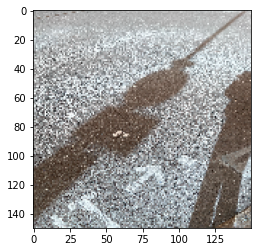

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

class_dict = {0:'Plain',     
              1:'Pothole'}


uploaded = files.upload()

for fn in uploaded.keys():
   # predicting images
  file_path = '/content/drive/My Drive/CASA0018_Deep Learning for Sensor Network/' + fn
  test_image = cv2.imread(file_path)
  test_image = cv2.resize(test_image, (150,150),interpolation=cv2.INTER_CUBIC)
  plt.imshow(test_image)
  test_image = np.expand_dims(test_image,axis=0)
  probs = model_pretrained.predict(test_image)
  pred_class = np.argmax(probs)

  pred_class = class_dict[pred_class]

  print('prediction class: ',pred_class)



## **Deploying a Model to Mobile Phone (iOS)**




In [ ]:
# Convert Keras model to TF Lite format.
converter = tf.lite.TFLiteConverter.from_keras_model(model_pretrained)
tflite_float_model = converter.convert()

# Show model size in KBs.
float_model_size = len(tflite_float_model) / 1024
print('Float model size = %dKBs.' % float_model_size)

INFO:tensorflow:Assets written to: /tmp/tmpj5rd6m74/assets


INFO:tensorflow:Assets written to: /tmp/tmpj5rd6m74/assets


Float model size = 85234KBs.


In [ ]:
# Re-convert the model to TF Lite using quantization.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Show model size in KBs.
quantized_model_size = len(tflite_quantized_model) / 1024
print('Quantized model size = %dKBs,' % quantized_model_size)
print('which is about %d%% of the float model size.'\
      % (quantized_model_size * 100 / float_model_size))


INFO:tensorflow:Assets written to: /tmp/tmpzpadixxh/assets


INFO:tensorflow:Assets written to: /tmp/tmpzpadixxh/assets


Quantized model size = 21747KBs,
which is about 25% of the float model size.


In [63]:
# A helper function to evaluate the TF Lite model using "test" dataset.
def evaluate_tflite_model(tflite_model):
  # Initialize TFLite interpreter using the model.
  interpreter = tf.lite.Interpreter(model_content=tflite_model)
  interpreter.allocate_tensors()
  # input_tensor_index = interpreter.get_input_details()[0]["index"]
  # output = interpreter.tensor(interpreter.get_output_details()[0]["index"])
  input_tensor_index = interpreter.get_input_details()
  output = interpreter.get_output_details()

  # Run predictions on every image in the "test" dataset.
  prediction_digits = []
  for test_image in testing_generator:
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    input_shape = input_tensor_index[0]['shape']
    test_image = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_tensor_index[0]['index'], test_image)
    
    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.

    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    output_data = interpreter.get_tensor(output[0]['index'])
    output_data = np.argmax(output_data[0]) #this line
    # output_data = max(output_data)
    prediction_digits.append(output_data)
    print(output_data)
    # print(output_data)    


  # Compare prediction results with ground truth labels to calculate accuracy.
  accurate_count = 0
  print(prediction_digits)
  for index in range(len(prediction_digits)):
    # if prediction_digits[index] == testing_generator.classes[index]:
    if prediction_digits == testing_generator.classes:
      accurate_count += 1
      print(accurate_count)
  accuracy = accurate_count * 1.0 / len(prediction_digits)

  return accuracy

# Evaluate the TF Lite float model.
float_accuracy = evaluate_tflite_model(tflite_float_model)
print('Float model accuracy = %.4f' % float_accuracy)

#Evalualte the TF Lite quantized model.
quantized_accuracy = evaluate_tflite_model(tflite_quantized_model)
print('Quantized model accuracy = %.4f' % quantized_accuracy)
print('Accuracy drop = %.4f' % (float_accuracy - quantized_accuracy))

In [ ]:
# Save the quantized model to file to the Downloads directory
f = open('my_4.tflite', "wb")
f.write(tflite_quantized_model)
f.close()

# Download the digit classification model
from google.colab import files
files.download('my_4.tflite')

print('`my_4.tflite` has been downloaded')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

`my_4.tflite` has been downloaded


# **Appendix**

## **Deployment to microchip**

### Generate a TensorFlow Lite Model

##### **1. Generate Models with and without Quantization**

In [ ]:
# Define paths to model files
# path = '/content/drive/My Drive/CASA0018_Deep Learning for Sensor Network'
import os
# MODELS_DIR = './model/'
MODELS_DIR = path
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + '/model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + '/model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + '/model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + '/model.cc'

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
model_no_quant_tflite = converter.convert()

# Save the model to disk
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)

# Convert the model to the TensorFlow Lite format with quantization
def representative_dataset_generator():
  # for value in x_train:
  for value in train_generator: ########New add##########
    # yield [np.array(value, dtype=np.float32, ndmin=2)]
    yield [np.array(value, dtype=np.float32, ndmin=2)] ########New add##########

# Set the optimization flag - DEFAULT includes quantization.
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Enforce integer only quantization to reduce model size
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

# Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset_generator

model_tflite = converter.convert()

# Save the model to disk
open(MODEL_TFLITE, "wb").write(model_tflite)

##### **2. Compare Model Performance**

To prove these models are accurate even after conversion and quantization, we'll compare their predictions and loss on our test dataset.

Helper functions

We define the predict (for predictions) and evaluate (for loss) functions for TFLite models.

Note: These are already included in a TF model, but not in a TFLite model.

In [ ]:
def predict_tflite(tflite_model, x_test):
  # Prepare the test data
  x_test_ = x_test.copy()
  x_test_ = x_test_.reshape((x_test.size, 1))
  x_test_ = x_test_.astype(np.float32)

  # Initialize the TFLite interpreter
  interpreter = tf.lite.Interpreter(model_content=tflite_model)
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  # If required, quantize the input layer (from float to integer)
  input_scale, input_zero_point = input_details["quantization"]
  if (input_scale, input_zero_point) != (0.0, 0):
    x_test_ = x_test_ / input_scale + input_zero_point
    x_test_ = x_test_.astype(input_details["dtype"])
  
  # Invoke the interpreter
  y_pred = np.empty(x_test_.size, dtype=output_details["dtype"])
  for i in range(len(x_test_)):
    interpreter.set_tensor(input_details["index"], [x_test_[i]])
    interpreter.invoke()
    y_pred[i] = interpreter.get_tensor(output_details["index"])[0]
  
  # If required, dequantized the output layer (from integer to float)
  output_scale, output_zero_point = output_details["quantization"]
  if (output_scale, output_zero_point) != (0.0, 0):
    y_pred = y_pred.astype(np.float32)
    y_pred = (y_pred - output_zero_point) * output_scale

  return y_pred

def evaluate_tflite(tflite_model, x_test, y_true):
  global model
  y_pred = predict_tflite(tflite_model, x_test)
  loss_function = tf.keras.losses.get(model.loss)
  loss = loss_function(y_true, y_pred).numpy()
  return loss

In [ ]:
# Calculate predictions
y_test_pred_tf = model.predict(x_test)
y_test_pred_no_quant_tflite = predict_tflite(model_no_quant_tflite, x_test)
y_test_pred_tflite = predict_tflite(model_tflite, x_test)

In [ ]:
# Compare predictions
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual values')
plt.plot(x_test, y_test_pred_tf, 'ro', label='TF predictions')
plt.plot(x_test, y_test_pred_no_quant_tflite, 'bx', label='TFLite predictions')
plt.plot(x_test, y_test_pred_tflite, 'gx', label='TFLite quantized predictions')
plt.legend()
plt.show()

In [ ]:
# Calculate size
size_tf = os.path.getsize(MODEL_TF)
size_no_quant_tflite = os.path.getsize(MODEL_NO_QUANT_TFLITE)
size_tflite = os.path.getsize(MODEL_TFLITE)

In [ ]:
# Compare size
pd.DataFrame.from_records(
    [["TensorFlow", f"{size_tf} bytes", ""],
     ["TensorFlow Lite", f"{size_no_quant_tflite} bytes ", f"(reduced by {size_tf - size_no_quant_tflite} bytes)"],
     ["TensorFlow Lite Quantized", f"{size_tflite} bytes", f"(reduced by {size_no_quant_tflite - size_tflite} bytes)"]],
     columns = ["Model", "Size", ""], index="Model")

##### **Summary**

We can see from the predictions (graph) and loss (table) that the original TF model, the TFLite model, and the quantized TFLite model are all close enough to be indistinguishable - even though they differ in size (table). This implies that the quantized (smallest) model is ready to use!

Note: The quantized (integer) TFLite model is just a few hundred bytes smaller than the original (float) TFLite model - a tiny reduction in size! This is because the model is already so small that quantization has little effect. Complex models with more weights, can have upto a 4x reduction in size!

### Generate a TensorFlow Lite for Microcontrollers Model

The final step is to convert the TensorFlow Lite quantized model into a C source file that can be loaded by TensorFlow Lite for Microcontrollers. Most microcontrollers don't have a filesystem so we need to provide the model as a C source file that can be loaded directly into memory. The model itself is defined as an array of bytes so we can use a Unix tool called xxd to convert a TFLite file into the required format.

In [ ]:
# Install xxd if it is not available
!apt-get update && apt-get -qq install xxd
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}

### Deploy to a Microcontroller

Follow the instructions in the hello_CASA README.md to deploy this model on to an Arduino Nano BLE Sense.

To use the model generated in this notebook you can either download your model from the left hand folder navigation and edit it in your favourite code editor, or you can view the values displayed after running the following cell and copy paste those into your Arduino sketch.

In [ ]:
# Print the C source file
!cat {MODEL_TFLITE_MICRO}